In [1]:
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
import math
# %pylab inline
from matplotlib import pyplot as plt
import random

In [2]:
cn_features = pd.read_csv('dataset_video.csv', header=None)

In [3]:
cn_features.get_values

<bound method NDFrame.get_values of            0       1       2   3   4         5         6         7         8   \
0    1005.jpg  171904  266229   1   8  3.609327  5.786311  0.061507  0.000018   
1    1020.jpg  174374  269980   1   8  3.617222  5.808520  0.061179  0.000018   
2    1035.jpg  166952  259987   1   8  3.666094  5.768350  0.062114  0.000019   
3    1050.jpg  178297  274452   1   8  3.717024  5.763923  0.059718  0.000017   
4    1065.jpg  181291  280864   1   8  3.657921  5.774430  0.062070  0.000017   
5    1080.jpg  176952  276148   1   8  3.683201  5.740675  0.063021  0.000018   
6    1095.jpg  174420  274301   1   8  3.764835  5.746088  0.065768  0.000018   
7    1110.jpg  167198  262659   1   8  3.757893  5.755775  0.064974  0.000019   
8    1125.jpg  167179  263125   1   8  3.808829  5.664751  0.066448  0.000019   
9    1140.jpg  166668  262601   1   8  3.765475  5.714957  0.066233  0.000019   
10   1155.jpg  166932  262708   1   8  3.761280  5.721943  0.065901  0.00

In [4]:
cn_features.describe()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14
count,424.000000,424.000000,424.0,424.0,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.0,424.0,424.000000,424.000000
mean,215550.818396,352342.801887,1.0,8.0,3.712930,5.582442,0.067684,0.000016,0.000387,0.230533,0.0,1.0,0.230533,0.528302
std,47913.231106,89341.026630,0.0,0.0,0.096709,0.206506,0.005091,0.000003,0.000107,0.015637,0.0,0.0,0.015637,0.509160
min,143681.000000,209739.000000,1.0,8.0,2.694517,5.066331,0.038356,0.000012,0.000259,0.187878,0.0,1.0,0.187878,0.000000
25%,167887.750000,264268.000000,1.0,8.0,3.645971,5.363422,0.063788,0.000013,0.000292,0.218083,0.0,1.0,0.218083,0.000000
50%,240172.000000,397536.000000,1.0,8.0,3.723091,5.532734,0.068326,0.000014,0.000338,0.236406,0.0,1.0,0.236406,1.000000
75%,260476.250000,438408.500000,1.0,8.0,3.791016,5.791119,0.072263,0.000019,0.000472,0.242970,0.0,1.0,0.242970,1.000000
max,286463.000000,481198.000000,1.0,8.0,3.847907,5.927963,0.076511,0.000021,0.001187,0.264631,0.0,1.0,0.264631,2.000000


In [5]:
cn_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 15 columns):
0     424 non-null object
1     424 non-null int64
2     424 non-null int64
3     424 non-null int64
4     424 non-null int64
5     424 non-null float64
6     424 non-null float64
7     424 non-null float64
8     424 non-null float64
9     424 non-null float64
10    424 non-null float64
11    424 non-null int64
12    424 non-null int64
13    424 non-null float64
14    424 non-null int64
dtypes: float64(7), int64(7), object(1)
memory usage: 49.8+ KB


In [6]:
cn_features = cn_features.drop([0],axis=1)
cn_features = cn_features.drop([3],axis=1)
cn_features = cn_features.drop([4],axis=1)
cn_features = cn_features.drop([11],axis=1)
cn_features = cn_features.drop([12],axis=1)

In [7]:
# cn_features.describe()
print(cn_features.get_values().shape)

(424, 10)


In [8]:
# Calculando as medidas de localização e dispersão
stats = np.zeros([4,10])
counter = 0
for column in cn_features:
#     print(column)
    stats[0,counter] = cn_features[column].mean()
    stats[1,counter] = cn_features[column].median()
#     stats[2,counter] = cn_features[column].mode()
    stats[2,counter] = cn_features[column].std()
    stats[3,counter] = cn_features[column].var()
#         stats[3,counter] = mydf[column].skew()
#         stats[4,counter] = mydf[column].kurt()
    counter += 1
print(stats.transpose())

[[2.15550818e+05 2.40172000e+05 4.79132311e+04 2.29567772e+09]
 [3.52342802e+05 3.97536000e+05 8.93410266e+04 7.98181904e+09]
 [3.71293046e+00 3.72309126e+00 9.67094041e-02 9.35270884e-03]
 [5.58244223e+00 5.53273364e+00 2.06505754e-01 4.26446264e-02]
 [6.76835548e-02 6.83262730e-02 5.09073327e-03 2.59155652e-05]
 [1.57246720e-05 1.38218025e-05 3.03163104e-06 9.19078675e-12]
 [3.87060291e-04 3.38325000e-04 1.06622774e-04 1.13684159e-08]
 [2.30533224e-01 2.36405946e-01 1.56367125e-02 2.44506777e-04]
 [2.30533224e-01 2.36405946e-01 1.56367125e-02 2.44506777e-04]
 [5.28301887e-01 1.00000000e+00 5.09160477e-01 2.59244391e-01]]


In [9]:
from sklearn import preprocessing

cn_features_data = cn_features.get_values()
# Create the Scaler object
scaler = preprocessing.MinMaxScaler()
# Fit your data on the scaler object
scaled_cn = scaler.fit_transform(cn_features_data[:,0:9])
scaled_cn = pd.DataFrame(scaled_cn)

scaled_cn.head()

,0,1,2,3,4,5,6,7,8
0,0.197665,0.208098,0.793149,0.835600,0.606755,0.647579,0.226739,0.572138,0.572138
1,0.214964,0.221916,0.799994,0.861376,0.598173,0.620801,0.237816,0.459421,0.459421
2,0.162983,0.185103,0.842367,0.814755,0.622663,0.713141,0.248812,0.364839,0.364839
3,0.242440,0.238390,0.886523,0.809617,0.559883,0.570203,0.229935,0.603046,0.603046
4,0.263409,0.262010,0.835281,0.821811,0.621519,0.552144,0.224306,0.668801,0.668801


In [10]:
scaled_cn.head()

,0,1,2,3,4,5,6,7,8
0,0.197665,0.208098,0.793149,0.835600,0.606755,0.647579,0.226739,0.572138,0.572138
1,0.214964,0.221916,0.799994,0.861376,0.598173,0.620801,0.237816,0.459421,0.459421
2,0.162983,0.185103,0.842367,0.814755,0.622663,0.713141,0.248812,0.364839,0.364839
3,0.242440,0.238390,0.886523,0.809617,0.559883,0.570203,0.229935,0.603046,0.603046
4,0.263409,0.262010,0.835281,0.821811,0.621519,0.552144,0.224306,0.668801,0.668801


In [11]:
scaled_cn.describe()

,0,1,2,3,4,5,6,7,8
count,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000,424.000000
mean,0.503353,0.525324,0.882974,0.598993,0.768645,0.411453,0.137865,0.555744,0.555744
std,0.335569,0.329114,0.083848,0.239668,0.133421,0.312091,0.114865,0.203727,0.203727
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.169536,0.200874,0.824919,0.344800,0.666544,0.121707,0.035893,0.393536,0.393536
50%,0.675792,0.691806,0.891784,0.541301,0.785490,0.215562,0.085363,0.632258,0.632258
75%,0.817997,0.842372,0.950675,0.841181,0.888669,0.724542,0.229801,0.717782,0.717782
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
# cn_features = cn_features.drop([0],axis=1)

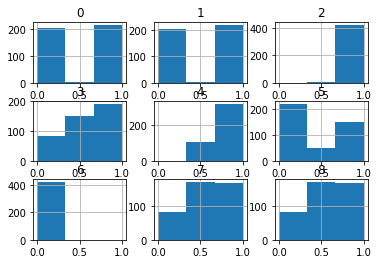

In [13]:
hist = scaled_cn.hist(bins=3)

In [14]:
mydf = scaled_cn

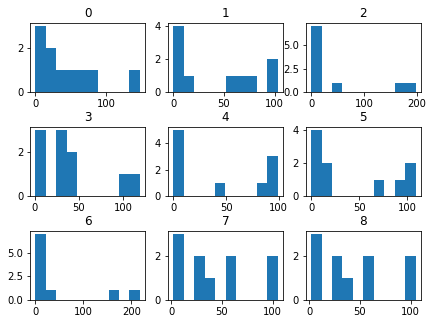

<Figure size 432x288 with 0 Axes>

In [15]:
# Gerando o histograma
counter = 1
plt.figure(figsize = (7,7))
for column in mydf:
    plt.subplot(4,3,int(counter))
    plt.title(column)
    count, division = np.histogram(mydf[column])
    plt.subplots_adjust(hspace=0.5)
    plt.hist(count)
    counter += 1
plt.show()
plt.savefig('hist.png')

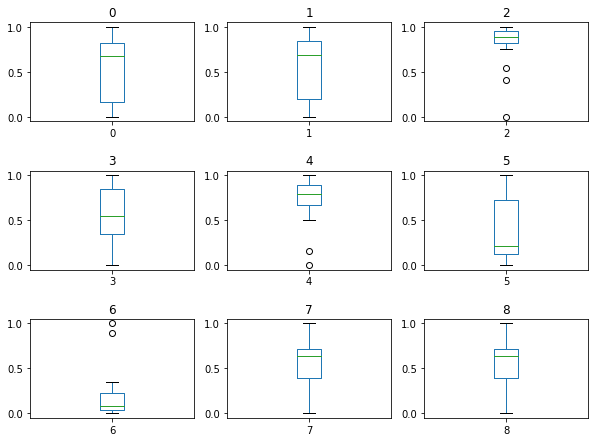

<Figure size 432x288 with 0 Axes>

In [16]:
# Gerando o boxplot
counter = 1
plt.figure(figsize = (10,10))
for column in mydf:
    plt.subplot(4,3,int(counter))
    plt.title(column)
    plt.subplots_adjust(hspace=0.5)
    mydf.boxplot(column, grid=False)
    counter += 1
plt.show()
plt.savefig('boxplot.png')

In [17]:
from sklearn.feature_selection import SelectKBest, f_regression
X_best=SelectKBest(f_regression, k=5)
X_new=X_best.fit_transform(scaled_cn,cn_features[14])

In [18]:
# X_new

In [19]:
mask = X_best.get_support()
new_features = scaled_cn.columns[mask]
print(new_features)

Int64Index([0, 1, 3, 5, 7], dtype='int64')


In [20]:
data_kbest = scaled_cn[[0,1,3,5,7]]
# data_kbest

In [21]:
def generateSubDataSet(data):
    features_to_delete = []
    for column in data:
        if random.randint(0, 1) == 0:  # Delete column
            features_to_delete = np.append(features_to_delete, column)
            
    subdataset = data.drop(features_to_delete, 1)
    return subdataset

In [22]:
def getInconsistency(subdataset, data):    
    features = subdataset.drop('Id', axis=1).columns

#    print('features: ', features)
    subdataset['is_duplicated'] = subdataset.duplicated(features)
    n  = subdataset['is_duplicated'].sum()    
#    print('n: ', n)
    classes_n = []
    for index, row in subdataset.iterrows():
        if row['is_duplicated'] == True:
            idx = row['Id']            
            current_class = data.loc[ idx - 1 , "Class"]
            classes_n = np.append(current_class, classes_n)
    
    unique_elements, counts_elements = np.unique(classes_n, return_counts=True)

    incosistency = 0
    for i in range (n):
        incosistency = incosistency + (n - counts_elements[i])
    
    if incosistency != 0:
        incosistency /= (n * 2)
    
    return incosistency

In [23]:
def LVF(data, max_tries, allow_inconsistency):
    n_features      = data.shape[0]
    best_n_features = n_features
    best_subdataset = []
    for i in range(max_tries):                    
        current_subdataset       = generateSubDataSet(data.drop(['Class', 'Id'], axis = 1))
        current_subdataset['Id'] = data['Id']
        current_subdataset[0] = data[0]        
        current_n_features = current_subdataset.shape[0]        
        if current_n_features < best_n_features:
            if getInconsistency(current_subdataset, data) < allow_inconsistency:
                best_subdataset = current_subdataset
                best_n_features = current_n_features            
        elif current_n_features == best_n_features and getInconsistency(current_subdataset, data) < allow_inconsistency:
            best_subdataset = current_subdataset
    best_subdataset = best_subdataset.drop('is_duplicated',1)
    return best_subdataset#, best_n_features      

In [24]:
def determinateDataWithOutCorrelation(data, index, column_class):
    corr_data = data.corr()         
    corr_data = corr_data.where(np.triu(np.ones(corr_data.shape), k = 1).astype(np.bool))        
    to_drop   = [column for column in corr_data.columns if any(corr_data[column].abs() > index)]
     
    print('FEATURES TO DELETE')
    print(to_drop)
    new_data  = pd.DataFrame(data = data)
     
    for column in new_data:
        if column in to_drop  and column_class != column:
            new_data = new_data.drop(column, 1)
     
    return new_data  

In [25]:
def CSF(df):
     # Empezamos a dibujar
    plt.figure(figsize=(30,25))
    
    # Obtenemos la correlacion entre los atributos
    cor = df.corr()
    print('########## CORRELATION BETWEEN FEATURES ##########')
    print(cor)
    
    # Ploteamos correlation
    #sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
    #plt.savefig('Correlations.png')
    
    # Correlation de todos los atributos contra el atributo 'SalePrice'
    cor_target = abs(cor['Class'])
    
    # Seleccionamos los atributos con al menos 0,5 de correlacion
    relevant_features = cor_target[cor_target>0.7]
    
    print('########## FEATURES WITH LONG CORRELATION WITH SALEPRICE ##########')
    print(relevant_features)
    
    for column in df:
        if column not in relevant_features:
            df = df.drop(column, 1)
            
    print('########## DATASET ( FEATURES WITH LONG CORRELATION WITH SALEPRICE )  ##########')
    print(df)
            

In [26]:
print('########## DATASET ( FEATURES WITH LONG CORRELATION WITH SALEPRICE AND WITHOUT CORRELATION BETWEEN THEM)  ##########')
# Eliminamos los atributos con un alto indice de correlacion
new_df = determinateDataWithOutCorrelation(mydf, 0.85, "Class")
print(new_df)

########## DATASET ( FEATURES WITH LONG CORRELATION WITH SALEPRICE AND WITHOUT CORRELATION BETWEEN THEM)  ##########
FEATURES TO DELETE
[1, 3, 5, 6, 8]
            0         2         4         7
0    0.197665  0.793149  0.606755  0.572138
1    0.214964  0.799994  0.598173  0.459421
2    0.162983  0.842367  0.622663  0.364839
3    0.242440  0.886523  0.559883  0.603046
4    0.263409  0.835281  0.621519  0.668801
5    0.233020  0.857198  0.646440  0.608888
6    0.215286  0.927977  0.718442  0.514948
7    0.164706  0.921957  0.697630  0.380626
8    0.164573  0.966119  0.736253  0.262418
9    0.160994  0.928531  0.730628  0.295717
10   0.162843  0.924894  0.721931  0.312416
11   0.163942  0.891487  0.695326  0.394300
12   0.168088  0.838728  0.682743  0.434526
13   0.062256  0.838014  0.855763  0.267378
14   0.088246  0.844733  0.783234  0.631076
15   0.090530  0.820601  0.774685  0.671671
16   0.083435  0.827948  0.762939  0.629356
17   0.089220  0.828300  0.786739  0.619741
18   0.08430

In [27]:
#data_CSF=CSF(mydf)
#print(data_CSF)

In [28]:
data_corr = mydf[[1, 3, 5, 6, 8]]

In [29]:
mydf = scaled_cn
col0 = np.zeros([424,1],dtype=int)
for i in range(col0.shape[0]):
    col0[i] = i
col0 = pd.DataFrame(data = col0)
col0.columns = ['Id']    
mydf = pd.concat([mydf,col0], axis=1)

In [30]:
mydf.head()

,0,1,2,3,4,5,6,7,8,Id
0,0.197665,0.208098,0.793149,0.835600,0.606755,0.647579,0.226739,0.572138,0.572138,0
1,0.214964,0.221916,0.799994,0.861376,0.598173,0.620801,0.237816,0.459421,0.459421,1
2,0.162983,0.185103,0.842367,0.814755,0.622663,0.713141,0.248812,0.364839,0.364839,2
3,0.242440,0.238390,0.886523,0.809617,0.559883,0.570203,0.229935,0.603046,0.603046,3
4,0.263409,0.262010,0.835281,0.821811,0.621519,0.552144,0.224306,0.668801,0.668801,4


In [31]:
label =pd.DataFrame(data = cn_features.get_values()[:,9])
label.columns = ['Class']
mydf = pd.concat([mydf, label], axis=1)

In [32]:
mydf.head()

,0,1,2,3,4,5,6,7,8,Id,Class
0,0.197665,0.208098,0.793149,0.835600,0.606755,0.647579,0.226739,0.572138,0.572138,0,0.0
1,0.214964,0.221916,0.799994,0.861376,0.598173,0.620801,0.237816,0.459421,0.459421,1,0.0
2,0.162983,0.185103,0.842367,0.814755,0.622663,0.713141,0.248812,0.364839,0.364839,2,0.0
3,0.242440,0.238390,0.886523,0.809617,0.559883,0.570203,0.229935,0.603046,0.603046,3,0.0
4,0.263409,0.262010,0.835281,0.821811,0.621519,0.552144,0.224306,0.668801,0.668801,4,0.0


In [33]:
# Cargamos dataset
new_df2 = LVF(mydf, 50, 0.5)

In [34]:
new_df2

,3,4,5,6,7,8,Id,0
0,0.835600,0.606755,0.647579,0.226739,0.572138,0.572138,0,0.197665
1,0.861376,0.598173,0.620801,0.237816,0.459421,0.459421,1,0.214964
2,0.814755,0.622663,0.713141,0.248812,0.364839,0.364839,2,0.162983
3,0.809617,0.559883,0.570203,0.229935,0.603046,0.603046,3,0.242440
4,0.821811,0.621519,0.552144,0.224306,0.668801,0.668801,4,0.263409
5,0.782635,0.646440,0.608479,0.205469,0.608888,0.608888,5,0.233020
6,0.788918,0.718442,0.649084,0.191683,0.514948,0.514948,6,0.215286
7,0.800161,0.697630,0.727173,0.241067,0.380626,0.380626,7,0.164706
8,0.694519,0.736253,0.731046,0.204279,0.262418,0.262418,8,0.164573
9,0.752788,0.730628,0.739066,0.207416,0.295717,0.295717,9,0.160994


In [35]:
data_lvf = mydf[[0,3,5,6,7]]
# data_lvf

In [36]:
new_df2 = new_df2.drop(['Id'], axis=1)

In [37]:
new_df2.head()

,3,4,5,6,7,8,0
0,0.835600,0.606755,0.647579,0.226739,0.572138,0.572138,0.197665
1,0.861376,0.598173,0.620801,0.237816,0.459421,0.459421,0.214964
2,0.814755,0.622663,0.713141,0.248812,0.364839,0.364839,0.162983
3,0.809617,0.559883,0.570203,0.229935,0.603046,0.603046,0.242440
4,0.821811,0.621519,0.552144,0.224306,0.668801,0.668801,0.263409


In [38]:
##Wrapper Selection Feature
##coded by jecs89
from sklearn.neural_network import MLPClassifier
import random

my_list = []
for column in mydf:
    my_list.append(column)
print(my_list)

def my_wrapper( mydf, N_test, size_col ):

    size_subset = int(mydf.shape[0]/10)
    x_subset = np.zeros([size_subset,size_col+1])

    mydf_data = mydf.get_values()

    vec_row = np.zeros([ N_test, size_subset])
    vec_col = np.zeros([ N_test, size_col ])
    vec_diff = np.zeros([ 1, N_test ])

    for n_test in range(0,N_test):
        x_row = random.sample(range(1, mydf.shape[0]), size_subset)
        x_row = np.sort(x_row)
        vec_row[n_test,:] = x_row

        x_col = random.sample(range(0, mydf_data.shape[1]-1), size_col)
        x_col = np.sort(x_col)
        vec_col[n_test,:] = x_col

        c = 0
        for idj in range(0, mydf_data.shape[1]-1):
            for idx_subset in range(0,size_subset):
                if( idj == x_col[c] ):
                    x_subset[idx_subset,c] = mydf_data[x_row[idx_subset],x_col[c]]
            if(idj == x_col[c]):
                c += 1
            if( c == size_col ):
                break;

        for idx_subset in range(0,size_subset):
            x_subset[idx_subset,x_subset.shape[1]-1] = mydf_data[x_row[idx_subset],mydf_data.shape[1]-1]

        x_st = x_subset[:,0:x_subset.shape[1]-1]
        y_st = x_subset[:,x_subset.shape[1]-1]

        clf = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', alpha=0.0001).fit(x_st,y_st)
        y_pdt = clf.predict(x_st)
        
        counter = 0
        for i in range(0,x_st.shape[0]):
            counter += (y_st[i] - y_pdt[i])*(y_st[i] - y_pdt[i])

        vec_diff[0,n_test] = counter
#         print(str(clf.score(x_st,y_st))+ ' ' + str(counter))

    my_min = vec_diff[0,0]
    idx = 0
    for i in range(1,N_test):
        if( my_min > vec_diff[0,i]):
            my_min = vec_diff[0,i]
            idx = i
            
#     print(vec_row[idx,:])
#     print(vec_col)
    
    res = np.zeros([mydf_data.shape[0],size_col+1])
    for i in range(0,mydf_data.shape[0]):
        for j in range(0,size_col):
            res[i,j] = mydf_data[i,int(vec_col[idx,j])]
    
    res[:,size_col] = mydf_data[:,mydf_data.shape[1]-1]
    
#     for i in range(0, size_col):
    ix = 0
    for i in range(0,size_col):
        print( my_list[int(vec_col[idx,i])])
        
#     return vec_col[idx,:]

[0, 1, 2, 3, 4, 5, 6, 7, 8, 'Id', 'Class']


In [39]:
size_col = 3
N_test = 20
mydf = pd.DataFrame(mydf)
my_wrapper( mydf=mydf, N_test=N_test, size_col=size_col)

/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimi

1
3
5


/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [40]:
new_df3 = mydf[[1,2,5,'Class']]

In [41]:
data_wrapper = mydf[[1,2,5]]

In [42]:
def euclidian( x1, x2):
    count = 0
    for i in range( 0, x1.shape[0]):
        count += math.pow(x1[i] - x2[i],2)
    return np.sqrt(count)

In [43]:
def most_frequent(List): 
    counter = 0
    num = List[0] 
      
    for i in List: 
        curr_frequency = List.count(i) 
        if(curr_frequency> counter): 
            counter = curr_frequency 
            num = i 
  
    return num 

In [44]:
### K-NN
# k = Quantidade de vecinos
# x = exemplo de prediçao
# X = dataset com somente os atributos
# Y = as classes de predição
def knn(K, x, X, Y,function):
    # Calculando distancias con otros puntos
    dist = []
    for i in range(X.shape[0]):
        dist.append( [ i, function( x, X[i,:] ) ] )
    
    # Ordenando dist crecientemente
    dist = np.array(dist)
    dist = dist[dist[:,1].argsort()]
    
    res = []
    idx=np.zeros(K)
    for r in range(K):
        res.append(Y[int(dist[r,0])])
        idx[r]=dist[r,0]
    return res, dist,idx

In [45]:
Euclidean Distancefrom sklearn.metrics import confusion_matrix

def save_value(x,y):
    if y == 0:
        return 0
    return x / y

def ConfusionMatrix(y_true,y_predict):
    CM=confusion_matrix(y_true, y_pred)
    return CM

# Multiclass Confusion Matrix
# Entries:
# y_true: true values of the classification
# y_predict: predict values of the classification
# C: quantity of classes 

# Haciendo la matriz de confusion binaria para la clase i
from sklearn.metrics import confusion_matrix
def MultiClassConfusionMatrix(y_true,y_pred):
    
    C= np.unique(y_true)
    D=len(C)
    
    # Matriz de confusion general 
    CM=confusion_matrix(y_true, y_pred)
    #print('###### General Confusion Matrix #####')
    #print(CM)
        
    accuracy=np.zeros(D)
    precision=np.zeros(D)
    recall=np.zeros(D)
    specificity=np.zeros(D)
    
    
    for i in range(D):
        #atrib=np.array(C)
        #print('aquiii')
        #print(C)
        atributo=C[i]
        row_i=CM[i,:]
        col_i=CM[:,i]
        
        row_i_without_i=np.delete(row_i,i,0)
        #print(row_i_without_i)
        col_i_without_i=np.delete(col_i,i,0)
        del_row_i=np.delete(CM,i,0)
        del_col_i=np.delete(del_row_i,i,1)
        
        VP=CM[i,i]
        #print(VP)
        FN=np.sum(row_i_without_i)
        #print(VN)
        FP=np.sum(col_i_without_i)
        VN=np.sum(del_col_i)
#         print('VP VN FP FN', VP, VN,FP,FN )
        
        CM_new=[[VP,FN],[FP,VN]]
        #print(CM_new)
        CM_new=np.array(CM_new) # casting

        # calculando las medidas de desempenho
        div1=VP+VN+FP+FN
        #print(div1)
        div2=VP+FP
        div3=VP+FN
        div4=VN+FP
        
        accuracy[i]=save_value((VP+VN),div1)
        precision[i]=save_value(VP,div2)
        recall[i]=save_value(VP,div3)
        specificity[i]=save_value(VN,div4)
        
        #print('###### Confusion Matrix para clase ',atributo, ' #####')
        #print(CM_new)    
        
    #Table = {'accuracy': accuracy} # 'precision': precision, 'recall': recall, 'specificity': specificity}
    #df = pd.DataFrame(data=Table)
    #print(type(accuracy))
    #print(accuracy.shape)
    return accuracy
    #print(df)

In [46]:
Euclidean Distancedef randomSubSampling(test_size,function,iris):    
    #iris = pd.read_csv('../input/bezdekIris.data',header=None)
    iris_data = iris.values
    nc = len(iris.columns)
    n_times_random_subsampling = 10
    
    lista=[]
    for i in range(n_times_random_subsampling):
        # iris_test_data é dataset con que eu vou fazer a teste
        iris_test = iris.sample(n = test_size, replace=True)
        iris_test_data = iris_test.values
        
        iris_test_data[iris_test_data.shape[0] - 2, : ] = iris_data[202, :]
        iris_test_data[iris_test_data.shape[0] - 1, : ] = iris_data[203, :]

        # iris_train_data é dataset onde eu vou fazer a busqueda de distancia
        iris_train = iris.drop(iris_test.index.values)
        iris_train_data = iris_train.values
        
        iris_train_data[iris_train_data.shape[0] - 2, : ] = iris_data[202, :]
        iris_train_data[iris_train_data.shape[0] - 1, : ] = iris_data[203, :]

        # Se guardan los atributos en X
        X_train = iris_train_data[:,0:nc-2]

        # Se guardan las clases en Y
        Y_train = iris_train_data[:,nc-1]

        K = 5
        X_test = iris_test_data[:,0:nc-2]
        Y_test =iris_test_data[:,nc-1]
        Y_pred = []
        #print('############################# ', i+1 , '-vez #############################')
        for j in range(iris_test_data.shape[0]):
            x = X_test[j,:]    
            res, dist,idx = knn(K, x, X_train, Y_train,function)                
            Y_pred.append(most_frequent(res))
                    
        #print('GENERAL CONFUSION MATRIX')
        #print(confusion_matrix(Y_test, Y_pred)) 
        #print('True Value: ', Y_test)
        #print('Predict Value: ', Y_pred)
        
        accuracy = MultiClassConfusionMatrix(Y_test,Y_pred)
        lista.append(accuracy)
    
#     print('lista')
#     print(lista)
#     print(len(lista))
    
#     print('list elem')
#     for l in lista:
#         print(l)
    
    new_lista = np.zeros([len(lista), 3])
    idx = 0
    for k in lista:
        new_lista[idx, :] = k
        idx += 1
    
# #     lista = np.array(lista)
#     print('lista')
#     print(lista)
#     print(lista.shape)
    
    M=np.sum(lista,axis=0)
    prom=(1/n_times_random_subsampling)*M
#     print('prom')
#     print(prom)
    return prom

In [47]:
# for d in distances:
        
#     print('Subsampling')
#     test_size = np.floor(0.25*424)
#     test_size=int(test_size)
#     prom = randomSubSampling(test_size,d,data_kbest)
#     print(prom)

In [48]:
test_size = np.floor(0.25*424)
test_size=int(test_size)
randomSubSampling(test_size,euclidian,new_df3)

array([0.98962264, 1.        , 0.98962264])

In [72]:
def kFoldCrossValidation(k_value,function,iris):
    #iris = pd.read_csv('../input/bezdekIris.data')
    iris_data = iris.values      
    n_times = math.ceil(iris_data.shape[0]/k_value)
    nc=len(iris.columns)
    
    lista = []
    for i in range(k_value):
        idx = n_times * i            
        # iris_test_data é dataset con que eu vou fazer a teste   
        iris_test = iris.iloc[idx:idx+n_times,:]
        iris_test_data = iris_test.values
        
        iris_test_data[iris_test_data.shape[0] - 4, : ] = iris_data[1, :]
        iris_test_data[iris_test_data.shape[0] - 3, : ] = iris_data[416, :]
        
        iris_test_data[iris_test_data.shape[0] - 2, : ] = iris_data[202, :]
        iris_test_data[iris_test_data.shape[0] - 1, : ] = iris_data[203, :]
        
        # iris_train_data é dataset onde eu vou fazer a busqueda de distancia
        iris_train = iris.drop(iris_test.index.values)
        iris_train_data = iris_train.values
        
        iris_train_data[iris_train_data.shape[0] - 4, : ] = iris_data[1, :]
        iris_train_data[iris_train_data.shape[0] - 3, : ] = iris_data[416, :]
        
        iris_train_data[iris_train_data.shape[0] - 2, : ] = iris_data[202, :]
        iris_train_data[iris_train_data.shape[0] - 1, : ] = iris_data[203, :]
                        
        # Se guardan los atributos en X
        X_train = iris_train_data[:,0:nc-2]
    
        # Se guardan las clases en Y
        Y_train = iris_train_data[:,nc-1]
    
        K = 5
        X_test = iris_test_data[:,0:nc-2]
        Y_test =iris_test_data[:,nc-1]
        Y_pred = []
#         print('############################# ', i+1 , '-vez #############################')
        for j in range(iris_test_data.shape[0]):
            x = X_test[j,:]    
            res, dist,idx = knn(K, x, X_train, Y_train,function)                
            Y_pred.append(most_frequent(res))
         
        #print('True Value: ', Y_test)
        #print('Predict Value: ', Y_pred)
        #print('CONFUSION MATRIX')
        #print(confusion_matrix(Y_test, Y_pred)) 
#         MultiClassConfusionMatrix(Y_test,Y_pred)
        
        accuracy = MultiClassConfusionMatrix(Y_test,Y_pred)
        lista.append(accuracy)
    
#     print('lista')
#     print(lista)
#     print(len(lista))
    
#     print('list elem')
#     for l in lista:
#         print(l)
    
#     new_lista = np.zeros([len(lista), 3])
#     idx = 0
#     for k in lista:
#         new_lista[idx, :] = k
#         idx += 1
    
# #     lista = np.array(lista)
#     print('lista')
#     print(lista)
#     print(lista.shape)
    
    M=np.sum(lista,axis=0)
    prom=(1/k_value)*M
#     print('prom')
#     print(prom)
    return prom


In [51]:
def leaveOneOut(function,iris):
    #iris = pd.read_csv('../input/bezdekIris.data')
    nc=len(iris.columns)
    iris_data = iris.values
    k_value = iris_data.shape[0]
    kFoldCrossValidation(k_value,function,iris)

In [52]:
# leaveOneOut(euclidian,new_df3)

In [53]:
# Distance 1: MSE distance 
# Obtiene distancia (MSE: Error cuadrático medio) entre dos puntos x1 y x2
def my_dis1( x1, x2):
    count = 0
    for i in range( 0, x1.shape[0]):
        count += (x1[i] - x2[i])*(x1[i] - x2[i])
    return np.sqrt(count)


# Distance 2: chebyshev distance (vista en clase)
# Calcula el máx de las distancias entre las componentes de los elementos x1 y x2
def my_dis2( x1, x2 ):
    my_list = []
    for i in range(0,x1.shape[0]):
        my_list.append( np.abs( x1[i] - x2[i]))
    my_list = np.array(my_list)
    
    return np.max(my_list)

# Distance 3: cosine distance (no vista en clase)
# calcula el coseno del ángulo entre los elementos n-dimensionales x1, x2
def my_dis3( x1, x2 ):
    my_list = []

    dot = np.dot(x1, x2)
    norma = np.linalg.norm(x1)
    normb = np.linalg.norm(x2)
    cos = dot / (norma * normb)
    
    return cos

In [54]:
iris_data=new_df3.get_values()

In [55]:
Euclidean Distance##My KNN Algorithm
def my_KNN(X,Y,x, K, function):
#     print(X[45:50,:])
#     print(Y[45:50])

    set_class = {}
    set_class = set(set_class)

    for i in range(Y.shape[0]):
        set_class.add(Y[i])

#     print(set_class)
    
    dist = []

    for i in range(X.shape[0]):
        dist.append( [ i, function( x, X[i,:] ) ] )
    dist = np.array(dist)    
    dist = dist[dist[:,1].argsort()]
#     print(dist[0:K,0])

    res = []
    for r in range(K):
        res.append(Y[int(dist[r,0])])
    res = np.array(res)
#     print(res)

    count_set = np.zeros( [ 1, 3] )
    cnt = 0

#     print(set_class)
    for i in set_class:
        for r in range(0,K):
#             print( i + ' ' + str(r) + ' ' + res[r] )
            if( i == res[r] ):
                count_set[0,cnt] += 1
        cnt += 1
#     print(count_set) ##Frequency of Classes
    
    class_max = np.max(count_set)
#     print(class_max)

    idx_max = 0
    for i in range(count_set.shape[1]):
        if( class_max == count_set[0,i] ):
            idx_max = i
#     print(idx_max)

    set_class = list(set_class)
    # print(set_class[0])
#     print(set_class[idx_max])
    return set_class[idx_max]

In [56]:
def remove_idx_item( X, idx ):
    X_tmp = []
    for ix in range(0,X.shape[0]):
        if( ix != idx ):
            X_tmp.append( X[ix,:] )
    X_tmp = np.array(X_tmp)
    
    return X_tmp

import random
def insert_random_point( X ):
    X_tmp = np.zeros([ X.shape[0]+1, X.shape[1]])
    
    X_tmp[0:X.shape[0],:] = X[:,:]
    
    for i in range( 0, X.shape[1]):
        X_tmp[ int(X.shape[0]), i] = random.random()
    
    return X_tmp

In [76]:
##Inserção sequencial
def insercao(iris_data, function):
    data = iris_data.get_values()
#     nc=len(data.columns)
#     print( data[0,0:data.shape[1]-1] )
#     print(type(data))
    nc = iris_data.shape[1]
    store = []
    grab_bag = []

    ##Step 1
    store.append( data[0,:] )
    # print(store[:][0:5])

    ##Step 2, 3 
    for i in range( 1, data.shape[0]):
        ar_store = np.array(store)
        x = data[i,0:data.shape[1]-1]

        ##Removing i item
        ar_store = remove_idx_item( ar_store, i )
        if( data[ i, data.shape[1]-1] == my_KNN( ar_store[:,0:nc-1], ar_store[:,nc-1], x, 1, function)):
            grab_bag.append(data[i,:])
        else:
            store.append(data[i,:])

    ##Step 4
    size_gbg = np.array(grab_bag).shape        
    for i in range( 1, size_gbg[0]):
        ar_store = np.array(store)
        ar_grab_bag = np.array(grab_bag)
        x = ar_grab_bag[i,0:ar_grab_bag.shape[1]-1]
        if( ar_grab_bag[ i, ar_grab_bag.shape[1]-1] == my_KNN( ar_store[:,0:nc-1], ar_store[:,nc-1], x, 1, function)):
            grab_bag.append(data[i,:])
        else:
            store.append(data[i,:])
    ar_store = np.array(store)
#     print(ar_store.shape)
    # print(ar_store[ar_store[:,0].argsort()])

    output = []
    nc = data.shape[1]
    for i in range(0,data.shape[0]):
        x = data[i,0:nc-1]
    #     print(x)
        y_est = my_KNN( ar_store[:,0:nc-1], ar_store[:,nc-1], x, 1, function)
        output.append( [ y_est, data[i,nc-1] ]  )
#     print(['y_est, y'])
    output = np.array(output)
#     print(output)
    return output

In [58]:
# MultiClassConfusionMatrix(output[:,1],output[:,0])

In [77]:
##Eliminação sequencial
def eliminicao(iris_data, function):
    data = iris_data.get_values()
    nc = data.shape[1]
#     print( data[0,0:data.shape[1]-1] )
#     print(type(data))
    store = []
    grab_bag = []

    ##Step 1
    for i in range(0, data.shape[0]):
        store.append( data[i,:] )

    ##Step 2, 3
    a_store = np.array(store)
    # print('ast_ ' + ' ' + str(a_store.shape[0]) )
    for i in range( 0, data.shape[0]):

        x = data[i,0:data.shape[1]-1]

        ##Removing i item
        ar_store = remove_idx_item( a_store, i )
    #     print( str(i) + ' ' + str(ar_store.shape[0]) )

    #     print( str(data[ i, data.shape[1]-1]) + ' ' + str(my_KNN( ar_store[:,0:4], ar_store[:,4], x, K = 1, function = my_mse)) )

        if( data[ i, data.shape[1]-1] == my_KNN( ar_store[:,0:nc-1], ar_store[:,nc-1], x, K = 1, function = function)):
            a_store = remove_idx_item( a_store, i)

#     print(a_store.shape)
    
    output = []
    nc = data.shape[1]
    for i in range(0,data.shape[0]):
        x = data[i,0:nc-1]
    #     print(x)
        y_est = my_KNN( ar_store[:,0:nc-1], ar_store[:,nc-1], x, K = 1, function = function )
        output.append( [ y_est, data[i,nc-1] ]  )
#     print(['y_est, y'])
    output = np.array(output)
#     print(output)
    return output

In [60]:
# MultiClassConfusionMatrix(output[:,1],output[:,0])

In [61]:
# data_kbest.head()
label =pd.DataFrame(data = cn_features.get_values()[:,9])
label.columns = ['10']
data_kbest = pd.concat([data_kbest, label], axis=1)

In [62]:
data_kbest.head()

,0,1,3,5,7,10
0,0.197665,0.208098,0.835600,0.647579,0.572138,0.0
1,0.214964,0.221916,0.861376,0.620801,0.459421,0.0
2,0.162983,0.185103,0.814755,0.713141,0.364839,0.0
3,0.242440,0.238390,0.809617,0.570203,0.603046,0.0
4,0.263409,0.262010,0.821811,0.552144,0.668801,0.0


In [63]:
label =pd.DataFrame(data = cn_features.get_values()[:,9])
data_corr = pd.concat([data_corr, label], axis=1)

In [64]:
data_corr.head()

,1,3,5,6,8,0
0,0.208098,0.835600,0.647579,0.226739,0.572138,0.0
1,0.221916,0.861376,0.620801,0.237816,0.459421,0.0
2,0.185103,0.814755,0.713141,0.248812,0.364839,0.0
3,0.238390,0.809617,0.570203,0.229935,0.603046,0.0
4,0.262010,0.821811,0.552144,0.224306,0.668801,0.0


In [65]:
label =pd.DataFrame(data = cn_features.get_values()[:,9])
data_lvf = pd.concat([data_lvf, label], axis=1)

In [66]:
data_lvf.head()

,0,3,5,6,7,0
0,0.197665,0.835600,0.647579,0.226739,0.572138,0.0
1,0.214964,0.861376,0.620801,0.237816,0.459421,0.0
2,0.162983,0.814755,0.713141,0.248812,0.364839,0.0
3,0.242440,0.809617,0.570203,0.229935,0.603046,0.0
4,0.263409,0.821811,0.552144,0.224306,0.668801,0.0


In [67]:
label =pd.DataFrame(data = cn_features.get_values()[:,9])
data_wrapper = pd.concat([data_wrapper, label], axis=1)

In [68]:
data_wrapper.head()

,1,2,5,0
0,0.208098,0.793149,0.647579,0.0
1,0.221916,0.799994,0.620801,0.0
2,0.185103,0.842367,0.713141,0.0
3,0.238390,0.886523,0.570203,0.0
4,0.262010,0.835281,0.552144,0.0


In [75]:
distances = [ my_dis1, my_dis2, my_dis3 ]
#functions = [randomSubSampling, kFoldCrossValidation, leaveOneOut, insercao, eliminicao ]

datasets = [ data_kbest, data_corr, data_lvf, data_wrapper ]

table = []

for data in datasets:
    for d in distances:
        print('Subsampling')
        test_size = np.floor(0.25*424)
        test_size=int(test_size)
        prom = randomSubSampling(test_size,d,data)
        table.append(prom)
    
        print('K-fold cross validation')
        k_fold = 10
        prom = kFoldCrossValidation(k_fold,d,data)
        table.append(prom)

#         print('Leave one out')
#         leaveOneOut(d,data)

        print('Insercion secuencial')
        output = insercao(data,d)
        prom = MultiClassConfusionMatrix(output[:,1],output[:,0])
        table.append(prom)

        print('eliminicao secuencial')
        output = eliminicao(data,d)
        prom = MultiClassConfusionMatrix(output[:,1],output[:,0])
        table.append(prom)




Subsampling
K-fold cross validation
Insercion secuencial
(4, 6)
eliminicao secuencial
[0.19766497 0.20809772 0.8356     0.64757921 0.57213823]
<class 'numpy.ndarray'>
Subsampling
K-fold cross validation
Insercion secuencial
(4, 6)
eliminicao secuencial
[0.19766497 0.20809772 0.8356     0.64757921 0.57213823]
<class 'numpy.ndarray'>
Subsampling
K-fold cross validation
Insercion secuencial
(423, 6)
eliminicao secuencial
[0.19766497 0.20809772 0.8356     0.64757921 0.57213823]
<class 'numpy.ndarray'>
Subsampling
K-fold cross validation
Insercion secuencial
(3, 6)
eliminicao secuencial
[0.20809772 0.8356     0.64757921 0.22673947 0.57213823]
<class 'numpy.ndarray'>
Subsampling
K-fold cross validation
Insercion secuencial
(3, 6)
eliminicao secuencial
[0.20809772 0.8356     0.64757921 0.22673947 0.57213823]
<class 'numpy.ndarray'>
Subsampling
K-fold cross validation
Insercion secuencial
(423, 6)
eliminicao secuencial
[0.20809772 0.8356     0.64757921 0.22673947 0.57213823]
<class 'numpy.ndar

/home/jecs89/anaconda3/envs/tutorialConda/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in double_scalars


K-fold cross validation
Insercion secuencial
(423, 4)
eliminicao secuencial
[0.20809772 0.79314895 0.64757921]
<class 'numpy.ndarray'>
[0.99716981 1.         0.99716981] [0.99716981 1.         0.99716981] [0.99716981 1.         0.99716981] 
[0.99767442 1.         0.99767442] [0.99767442 1.         0.99767442] [0.99767442 1.         0.99767442] 
[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] 
[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] 


In [84]:
i = 0
for data in range(len(datasets)):
    for d in range(len(distances)):
        print( table[i], end = ' '  )
        i += 1
        print( table[i], end = ' '  )
        i += 1
        print( table[i], end = ' '  )
        i += 1
        print( table[i], end = ' '  )
        i += 1
    print('\n')

[0.99716981 1.         0.99716981] [0.99767442 1.         0.99767442] [1. 1. 1.] [1. 1. 1.] [0.9990566 1.        0.9990566] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [0.56792453 0.         0.43207547] [0.54380893 0.         0.45619107] [0.0259434  0.0259434  0.94811321] [0.0259434  0.0259434  0.94811321] 

[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [0.5509434  0.00471698 0.44433962] [0.54380893 0.00232558 0.45386549] [0.22877358 0.00471698 0.76650943] [0.22877358 0.00471698 0.76650943] 

[1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [1. 1. 1.] [0.52641509 0.00283019 0.47075472] [0.54380893 0.00232558 0.45386549] [0.22169811 0.         0.77830189] [0.22169811 0.         0.77830189] 

[0.9990566 1.        0.9990566] [0.99767442 1.         0.99767442] [1. 1. 1.] [1. 1. 1.] [0.99811321 1.         0.99811321] [0.99767442 1.         0.99767442] [1. 1. 1.] [1. 1. 1.] [0.08018868 0.         0.91981132] [0.05191703 0.         0.

In [83]:
print(np.array(table))

[[0.99716981 1.         0.99716981]
 [0.99767442 1.         0.99767442]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.9990566  1.         0.9990566 ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.56792453 0.         0.43207547]
 [0.54380893 0.         0.45619107]
 [0.0259434  0.0259434  0.94811321]
 [0.0259434  0.0259434  0.94811321]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.5509434  0.00471698 0.44433962]
 [0.54380893 0.00232558 0.45386549]
 [0.22877358 0.00471698 0.76650943]
 [0.22877358 0.00471698 0.76650943]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.        ]
 [1.         1.         1.  

In [81]:
print(len(table))

48
